In [45]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

## 1D wavefield

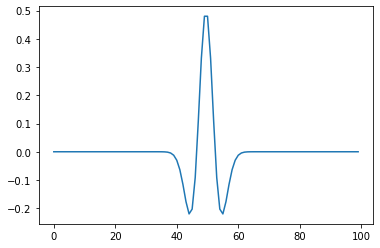

In [46]:
points = 100
a = 3.0
wave = signal.ricker(points, a) # (Number of points, Width)
wave = np.array(wave, dtype=np.float32)
plt.plot(wave)
plt.show()

#### Make Model

In [47]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(1,))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
outputs = layers.Dense(1)(x)

model = keras.Model(inputs=inputs, outputs=outputs)

#### Prepare data

In [48]:
train_data = np.arange(points) / points
train_labels = wave

#### Training

In [49]:
model.compile(optimizer="adam",
    loss="MSE",
    metrics=["accuracy"])
model.fit(train_data, train_labels, epochs=400, batch_size=64, verbose=0)

#### Inferencing

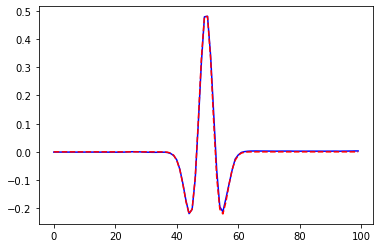

In [50]:
sample = train_data
wave_pred = model.predict(sample)
plt.plot(wave_pred, 'b')
plt.plot(wave, 'r--')
plt.show()

#### Interepolation !

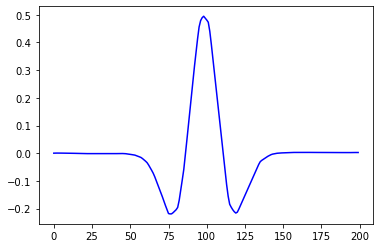

In [51]:
npoints = 400 
fine_samples = np.arange(npoints) / npoints
fine_samples = fine_samples[100:300]
wave_pred2 = model.predict(fine_samples)
plt.plot(wave_pred2, 'b')
plt.show()

## 2D Wavefield

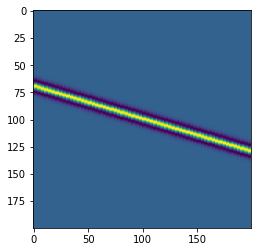

In [69]:
points=100
a = 3.0
wave_1d = signal.ricker(points, a) # (Number of points, Width)

n_times = 200
n_offsets = 200
wave_2d = np.zeros((n_times, n_offsets))
slope = 0.3             
t0 = 20

for j in range(n_offsets):
    for i in range(points):
        wave_2d[i + t0 + int(slope*j),j] = wave_1d[i] 

#wave_2d = np.array(wave, dtype=np.float32)
plt.imshow(wave_2d)

In [70]:
inputs = keras.Input(shape=(2,))
x = layers.Dense(256, activation='relu')(inputs)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
outputs = layers.Dense(1)(x)

model2 = keras.Model(inputs=inputs, outputs=outputs)
model2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_25 (Dense)            (None, 256)               768       
                                                                 
 dense_26 (Dense)            (None, 512)               131584    
                                                                 
 dense_27 (Dense)            (None, 1024)              525312    
                                                                 
 dense_28 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_29 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 1,708,289
Trainable params: 1,708,289
Non-tra

In [71]:
t = np.arange(n_times) / n_times
x = np.arange(n_offsets) / n_offsets
T, X = np.meshgrid(t, x)
train_data = np.dstack((T,X))
train_data = np.reshape(train_data,[-1,2])
train_labels = np.reshape(wave_2d,[-1,1])

In [72]:
T.shape, X.shape, train_data.shape, train_labels.shape

((200, 200), (200, 200), (40000, 2), (40000, 1))

In [73]:
T[0,0], T[0,1], X[0,0], X[0,1], train_data[0], train_data[1]

(0.0, 0.005, 0.0, 0.0, array([0., 0.]), array([0.005, 0.   ]))

In [74]:
model2.compile(optimizer="adam",
    loss="MSE",
    metrics=["accuracy"])
model2.fit(train_data, train_labels, epochs=100, batch_size=512, verbose=0)

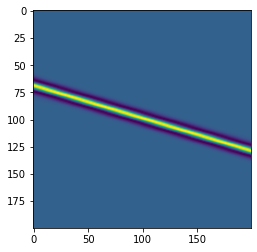

In [75]:
sample = train_data
wave2d_pred = model2.predict(sample)
plt.imshow(wave2d_pred.reshape((n_times, n_offsets)))

In [76]:
max(wave2d_pred), min(wave2d_pred)

(array([0.48938972], dtype=float32), array([-0.22265007], dtype=float32))

In [77]:
t2 = np.arange(2*n_times) / (2*n_times)
x2 = np.arange(2*n_offsets) / (2*n_offsets)
T2, X2 = np.meshgrid(t2, x2)
train_data2 = np.dstack((T2,X2))
train_data2 = np.reshape(train_data2,[-1,2])

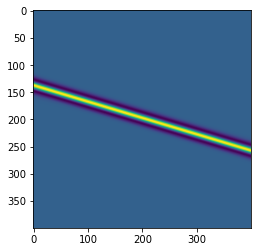

In [78]:
sample2 = train_data2
wave2d_pred2 = model2.predict(sample2)
plt.imshow(wave2d_pred2.reshape((2*n_times, 2*n_offsets)))

### Hyprebolas

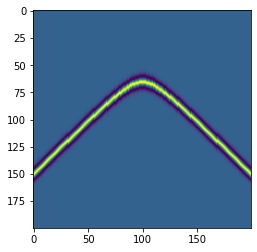

In [79]:
hyperbola = np.zeros((n_times, n_offsets))
x0 = n_offsets / 2 
t0 = points / 6
for j in range(n_offsets):
    t = np.sqrt(t0*t0 + (j-x0)*(j-x0))
    it = t.astype(int)
    for i in range(points-30):
        hyperbola[i + it,j] = wave_1d[i] 
        
plt.imshow(hyperbola)

In [80]:
train_labels = np.reshape(hyperbola,[-1,1])
model2.compile(optimizer="adam",
    loss="MSE",
    metrics=["accuracy"])
model2.fit(train_data, train_labels, epochs=100, batch_size=512, verbose=0)

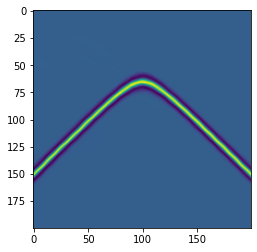

In [81]:
hyperbola_pred = model2.predict(train_data)
plt.imshow(hyperbola_pred.reshape((n_times, n_offsets)))